<a href="https://colab.research.google.com/github/Hub-Rodrigo/Analise-de-dados/blob/main/Tarefa1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Visualização: Total de Vendas por Produto

Para visualizar o total de vendas por produto, vamos criar um gráfico de barras.

/tmp/ipython-input-795615553.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='produto', y='valor', data=total_vendas_produto, palette='viridis')


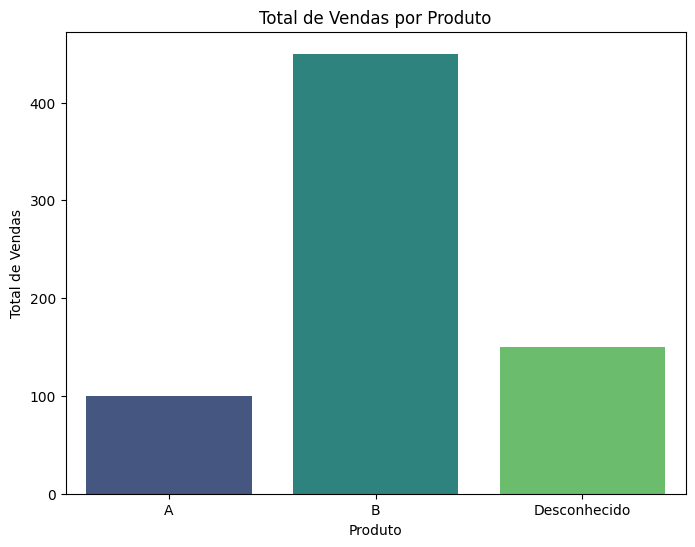

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcula o total de vendas por produto
total_vendas_produto = df.groupby('produto')['valor'].sum().reset_index()

# Cria o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='produto', y='valor', data=total_vendas_produto, palette='viridis')
plt.title('Total de Vendas por Produto')
plt.xlabel('Produto')
plt.ylabel('Total de Vendas')
plt.show()

### Visualização: Total de Vendas por Cliente

Vamos visualizar o total de vendas gerado por cada cliente para identificar os que mais contribuem para a receita.

/tmp/ipython-input-1137874120.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cliente', y='valor', data=total_vendas_cliente, palette='viridis')


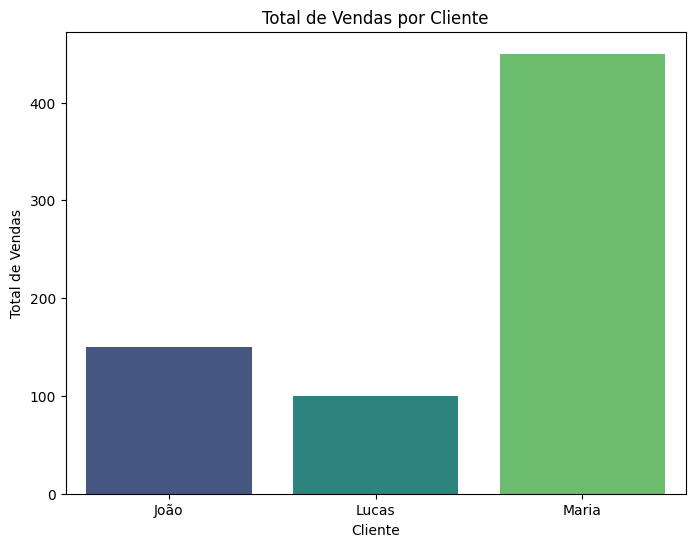

In [11]:
# Calcula o total de vendas por cliente
total_vendas_cliente = df.groupby('cliente')['valor'].sum().reset_index()

# Cria o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='cliente', y='valor', data=total_vendas_cliente, palette='viridis')
plt.title('Total de Vendas por Cliente')
plt.xlabel('Cliente')
plt.ylabel('Total de Vendas')
plt.show()

### Visualização: Vendas ao Longo do Tempo

Para entender a evolução das vendas, vamos criar um gráfico de linha mostrando o total de vendas por data.

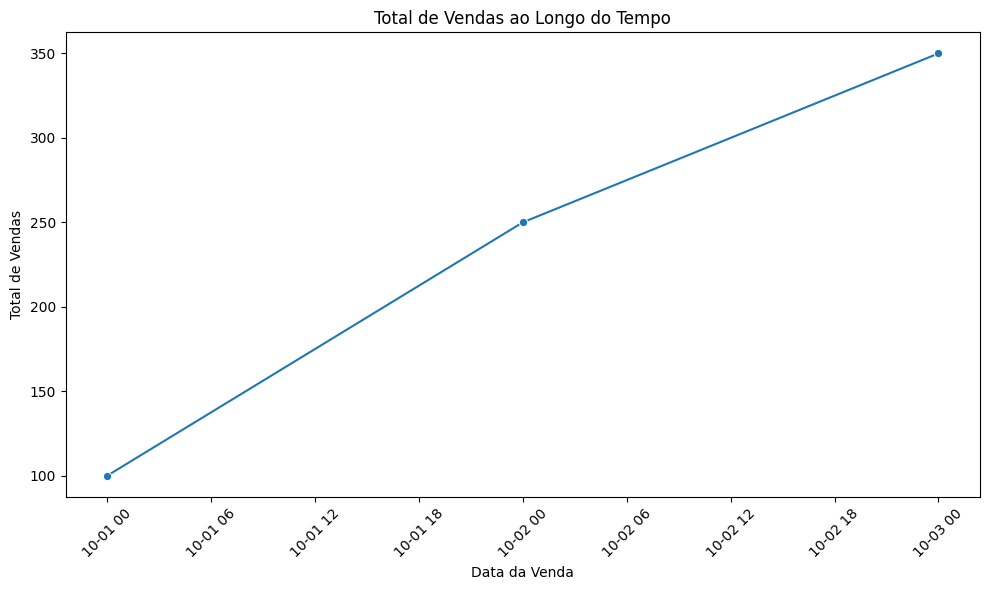

In [10]:
# Agrupa as vendas por data e soma os valores
vendas_por_data = df.groupby('data_venda')['valor'].sum().reset_index()

# Cria o gráfico de linha
plt.figure(figsize=(10, 6))
sns.lineplot(x='data_venda', y='valor', data=vendas_por_data, marker='o')
plt.title('Total de Vendas ao Longo do Tempo')
plt.xlabel('Data da Venda')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5. Documente

Vamos salvar o resultado em um novo CSV e escrever dois insights com base nos dados já tratados.

In [7]:
# Salva o DataFrame limpo em um novo arquivo CSV
df.to_csv('vendas_limpas.csv', index=False)

print("DataFrame limpo salvo em 'vendas_limpas.csv'")

DataFrame limpo salvo em 'vendas_limpas.csv'


**Insights Obtidos:**

1.  **Total de Vendas por Produto:** Observamos que o produto 'B' gerou a maior receita total, seguido pelo produto 'A' e, por fim, os produtos 'Desconhecido'. Isso sugere que o produto 'B' é o mais popular ou de maior valor entre os clientes.
2.  **Cliente com Maior Ticket Médio:** A cliente Maria apresentou o maior ticket médio de compra. Isso indica que, em média, as compras realizadas por Maria têm um valor mais alto em comparação com os outros clientes. Pode ser interessante investigar o comportamento de compra de Maria para identificar padrões que possam ser aplicados a outros clientes.

### 4. Gere Insights Iniciais

Agora que os dados estão limpos, podemos gerar alguns insights iniciais.

In [6]:
# Total de vendas por produto
print("Total de vendas por produto:")
display(df.groupby('produto')['valor'].sum())

# Cliente com maior ticket médio
print("\nCliente com maior ticket médio:")
display(df.groupby('cliente')['valor'].mean().sort_values(ascending=False))

Total de vendas por produto:


,valor
produto,
A,100.0
B,450.0
Desconhecido,150.0



Cliente com maior ticket médio:


,valor
cliente,
Maria,225.0
João,150.0
Lucas,100.0


### 3. Limpe os Dados

Com base na exploração, vamos limpar os dados para corrigir os problemas identificados.

In [5]:
# Remove linhas duplicadas com base no 'venda_id'
print("DataFrame antes de remover duplicatas:")
display(df)
df = df.drop_duplicates(subset=['venda_id'])
print("\nDataFrame depois de remover duplicatas:")
display(df)

# Preenche valores nulos na coluna 'valor' com a mediana
print("\nDataFrame antes de preencher nulos em 'valor':")
display(df)
df['valor'] = df['valor'].fillna(df['valor'].median())
print("\nDataFrame depois de preencher nulos em 'valor':")
display(df)

# Converte a coluna 'data_venda' para o tipo datetime
# Usamos errors='coerce' para transformar valores inválidos em NaT (Not a Time)
print("\nDataFrame antes de converter 'data_venda' para datetime:")
display(df)
df['data_venda'] = pd.to_datetime(df['data_venda'], errors='coerce')
print("\nDataFrame depois de converter 'data_venda' para datetime:")
display(df)

# Remove linhas com valores nulos nas colunas 'data_venda' e 'produto'
print("\nDataFrame antes de remover linhas com nulos em 'data_venda' e 'produto':")
display(df)
df = df.dropna(subset=['data_venda', 'produto'])
print("\nDataFrame depois de remover linhas com nulos em 'data_venda' e 'produto':")
display(df)


# Padroniza valores vazios na coluna 'produto' para 'Desconhecido'
print("\nDataFrame antes de padronizar valores vazios em 'produto':")
display(df)
df['produto'] = df['produto'].replace('', 'Desconhecido')
print("\nDataFrame depois de padronizar valores vazios em 'produto':")
display(df)

DataFrame antes de remover duplicatas:


,venda_id,data_venda,cliente,produto,valor
0,1,2025-10-01,Lucas,A,100.0
1,2,2025-10-02,Maria,B,250.0
2,3,2025-10-03,João,,NaN
3,4,2025-10-03,Maria,B,200.0
4,5,None,João,A,100.0
5,5,2025-10-05,Lucas,A,100.0



DataFrame depois de remover duplicatas:


,venda_id,data_venda,cliente,produto,valor
0,1,2025-10-01,Lucas,A,100.0
1,2,2025-10-02,Maria,B,250.0
2,3,2025-10-03,João,,NaN
3,4,2025-10-03,Maria,B,200.0
4,5,None,João,A,100.0



DataFrame antes de preencher nulos em 'valor':


,venda_id,data_venda,cliente,produto,valor
0,1,2025-10-01,Lucas,A,100.0
1,2,2025-10-02,Maria,B,250.0
2,3,2025-10-03,João,,NaN
3,4,2025-10-03,Maria,B,200.0
4,5,None,João,A,100.0



DataFrame depois de preencher nulos em 'valor':


/tmp/ipython-input-1146412455.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['valor'] = df['valor'].fillna(df['valor'].median())


,venda_id,data_venda,cliente,produto,valor
0,1,2025-10-01,Lucas,A,100.0
1,2,2025-10-02,Maria,B,250.0
2,3,2025-10-03,João,,150.0
3,4,2025-10-03,Maria,B,200.0
4,5,None,João,A,100.0



DataFrame antes de converter 'data_venda' para datetime:


,venda_id,data_venda,cliente,produto,valor
0,1,2025-10-01,Lucas,A,100.0
1,2,2025-10-02,Maria,B,250.0
2,3,2025-10-03,João,,150.0
3,4,2025-10-03,Maria,B,200.0
4,5,None,João,A,100.0



DataFrame depois de converter 'data_venda' para datetime:


/tmp/ipython-input-1146412455.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data_venda'] = pd.to_datetime(df['data_venda'], errors='coerce')


,venda_id,data_venda,cliente,produto,valor
0,1,2025-10-01,Lucas,A,100.0
1,2,2025-10-02,Maria,B,250.0
2,3,2025-10-03,João,,150.0
3,4,2025-10-03,Maria,B,200.0
4,5,NaT,João,A,100.0



DataFrame antes de remover linhas com nulos em 'data_venda' e 'produto':


,venda_id,data_venda,cliente,produto,valor
0,1,2025-10-01,Lucas,A,100.0
1,2,2025-10-02,Maria,B,250.0
2,3,2025-10-03,João,,150.0
3,4,2025-10-03,Maria,B,200.0
4,5,NaT,João,A,100.0



DataFrame depois de remover linhas com nulos em 'data_venda' e 'produto':


,venda_id,data_venda,cliente,produto,valor
0,1,2025-10-01,Lucas,A,100.0
1,2,2025-10-02,Maria,B,250.0
2,3,2025-10-03,João,,150.0
3,4,2025-10-03,Maria,B,200.0



DataFrame antes de padronizar valores vazios em 'produto':


,venda_id,data_venda,cliente,produto,valor
0,1,2025-10-01,Lucas,A,100.0
1,2,2025-10-02,Maria,B,250.0
2,3,2025-10-03,João,,150.0
3,4,2025-10-03,Maria,B,200.0



DataFrame depois de padronizar valores vazios em 'produto':


,venda_id,data_venda,cliente,produto,valor
0,1,2025-10-01,Lucas,A,100.0
1,2,2025-10-02,Maria,B,250.0
2,3,2025-10-03,João,Desconhecido,150.0
3,4,2025-10-03,Maria,B,200.0


### 2. Explore os Dados

Vamos explorar os dados para entender sua estrutura, tipos de dados, valores ausentes e duplicados.

In [4]:
# Exibe informações sobre o DataFrame, incluindo tipos de dados e contagem de valores não nulos
print("Informações do DataFrame:")
print(df.info())

# Exibe estatísticas descritivas para as colunas numéricas
print("\nEstatísticas descritivas:")
print(df.describe())

# Conta o número de valores nulos por coluna
print("\nValores nulos por coluna:")
print(df.isnull().sum())

# Conta o número de linhas duplicadas
print("\nNúmero de linhas duplicadas:")
print(df.duplicated().sum())

# Anote os principais problemas detectados.
print("\nPrincipais problemas detectados (anotações):")
print("- Valores nulos nas colunas 'data_venda' e 'valor'.")
print("- Valores vazios (string vazia) na coluna 'produto'.")
print("- Linhas duplicadas.")
print("- A coluna 'data_venda' está como tipo 'object' e precisa ser convertida para datetime.")

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   venda_id    6 non-null      int64  
 1   data_venda  5 non-null      object 
 2   cliente     6 non-null      object 
 3   produto     6 non-null      object 
 4   valor       5 non-null      float64
dtypes: float64(1), int64(1), object(3)
memory usage: 372.0+ bytes
None

Estatísticas descritivas:
       venda_id       valor
count  6.000000    5.000000
mean   3.333333  150.000000
std    1.632993   70.710678
min    1.000000  100.000000
25%    2.250000  100.000000
50%    3.500000  100.000000
75%    4.750000  200.000000
max    5.000000  250.000000

Valores nulos por coluna:
venda_id      0
data_venda    1
cliente       0
produto       0
valor         1
dtype: int64

Número de linhas duplicadas:
0

Principais problemas detectados (anotações):
- Valores nulos nas colunas 'data_vend

# Guia de Limpeza e Análise de Dados no Google Colab

Este guia detalhado mostrará como carregar, explorar, limpar e gerar insights iniciais a partir de um dataset de exemplo usando Python no Google Colab.

## Passo a Passo (Execução em Colab)

### 1. Carregue o Dataset

Vamos carregar um dataset de exemplo usando um snippet de código Python. Este snippet cria um DataFrame simples com dados de vendas.

In [3]:
import pandas as pd

data = {
    'venda_id': [1, 2, 3, 4, 5, 5],
    'data_venda': ['2025-10-01', '2025-10-02', '2025-10-03', '2025-10-03', None, '2025-10-05'],
    'cliente': ['Lucas', 'Maria', 'João', 'Maria', 'João', 'Lucas'],
    'produto': ['A', 'B', '', 'B', 'A', 'A'],
    'valor': [100, 250, None, 200, 100, 100]
}
df = pd.DataFrame(data)

# Exibimos as primeiras linhas do DataFrame para verificar se foi carregado corretamente
print("DataFrame carregado:")
display(df.head())

DataFrame carregado:


,venda_id,data_venda,cliente,produto,valor
0,1,2025-10-01,Lucas,A,100.0
1,2,2025-10-02,Maria,B,250.0
2,3,2025-10-03,João,,NaN
3,4,2025-10-03,Maria,B,200.0
4,5,None,João,A,100.0
